<a href="https://colab.research.google.com/github/Christy538/COVID-19-and-its-impact-on-students/blob/main/COVID-19-and-its-impact-on-students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 and its impact on students**


### **COVID-19 and its impact on education, social life and mental health of students**

In this project, we'll analyze the **COVID-19 and its Impact on Students** survey dataset. The dataset used for this analysis was taken from: https://www.kaggle.com/kunal28chaturvedi/covid19-and-its-impact-on-students . In this study, a cross-sectional survey is conducted with a sample size of 1182 students of different age groups from different educational institutions in Delhi National Capital Region (NCR). 

This project was done as a part of the course project for [Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas) ,  a practical and beginner-friendly introductory course to data analysis covering the basics of Python, Numpy, Pandas, Data Visualization, and Exploratory Data Analysis.

### **Downloading the Dataset**

 We'll use the `opendatasets` library to download the files.

In [ ]:
pip install opendatasets --upgrade

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/kunal28chaturvedi/covid19-and-its-impact-on-students?rvi=1' 

In [ ]:
import opendatasets as od
od.download(dataset_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: christythomas5
Your Kaggle Key: ··········


100%|██████████| 20.8k/20.8k [00:00<00:00, 13.9MB/s]

The dataset has been downloaded and extracted.

In [ ]:
data_dir = './covid19-and-its-impact-on-students'

In [ ]:
import os
os.listdir(data_dir)

['COVID-19 Survey Student Responses.csv']

## **Data Preparation and Cleaning**




Let's load the CSV file using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [ ]:
import pandas as pd

In [ ]:
survey_raw_df = pd.read_csv('covid19-and-its-impact-on-students/COVID-19 Survey Student Responses.csv')

In [ ]:
survey_raw_df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


Let's now view some basic statistics about numeric columns.

In [ ]:
survey_raw_df.shape

(1182, 19)

The dataset contains 1182 responses to 19 questions. The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame using `survey_raw_df.columns`. 

In [ ]:
survey_raw_df.columns

Index(['ID', 'Region of residence', 'Age of Subject',
       'Time spent on Online Class', 'Rating of Online Class experience',
       'Medium for online class', 'Time spent on self study',
       'Time spent on fitness', 'Time spent on sleep',
       'Time spent on social media', 'Prefered social media platform',
       'Time spent on TV', 'Number of meals per day', 'Change in your weight',
       'Health issue during lockdown', 'Stress busters', 'Time utilized',
       'Do you find yourself more connected with your family, close friends , relatives  ?',
       'What you miss the most'],
      dtype='object')

In [ ]:
survey_raw_df.describe()

,Age of Subject,Time spent on Online Class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Number of meals per day
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000


Our data seems to be clean because there are not negative minimum values and maximum values too make some sense, not much higher values are present.

In [ ]:
survey_raw_df.nunique()

ID                                                                                    1182
Region of residence                                                                      2
Age of Subject                                                                          42
Time spent on Online Class                                                              21
Rating of Online Class experience                                                        5
Medium for online class                                                                  5
Time spent on self study                                                                23
Time spent on fitness                                                                   11
Time spent on sleep                                                                     18
Time spent on social media                                                              22
Prefered social media platform                                                          16

In [ ]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that some columns contains some empty values since the Non-Null count for every column is lower than the total number of rows (1182).


In [ ]:
survey_raw_df.isna().sum().sort_values(ascending=False).head(5)

Medium for online class              51
Rating of Online Class experience    24
What you miss the most                0
Time spent on sleep                   0
Region of residence                   0
dtype: int64

We have NaN values in two columns. Let's check the percentage of NaN values in these columns.

In [ ]:
perc_nan=survey_raw_df.isna().sum()/len(survey_raw_df)*100

In [ ]:
perc_nan.sort_values(ascending=False).head(2)

Medium for online class              4.314721
Rating of Online Class experience    2.030457
dtype: float64

Since the percentage of NaN values are very less our dataframe seems good enough for the analysis.

In [ ]:
survey_raw_df.columns = survey_raw_df.columns.str.replace(' ', '_')

In [ ]:
survey_raw_df

,ID,Region_of_residence,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Time_spent_on_TV,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Stress_busters,Time_utilized,"Do_you_find_yourself_more_connected_with_your_family,_close_friends_,_relatives__?",What_you_miss_the_most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


We can drop the `ID` column as it's a unique id and it will not make any effect in our analysis. We can do this by creating a copy of our dataframe and original one will be retained.

In [ ]:
survey_df = survey_raw_df.copy()

In [ ]:
survey_df.drop(['ID'], axis=1, inplace =True)

In [ ]:
survey_df

,Region_of_residence,Age_of_Subject,Time_spent_on_Online_Class,Rating_of_Online_Class_experience,Medium_for_online_class,Time_spent_on_self_study,Time_spent_on_fitness,Time_spent_on_sleep,Time_spent_on_social_media,Prefered_social_media_platform,Time_spent_on_TV,Number_of_meals_per_day,Change_in_your_weight,Health_issue_during_lockdown,Stress_busters,Time_utilized,"Do_you_find_yourself_more_connected_with_your_family,_close_friends_,_relatives__?",What_you_miss_the_most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


## **Exploratory Analysis and Visualization**

The exploratory analysis will help us to understand how the variables interact and how representative they are.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### **Region of Residence**

In [ ]:
region = survey_df.Region_of_residence.value_counts()
region

Delhi-NCR            721
Outside Delhi-NCR    461
Name: Region_of_residence, dtype: int64

In [ ]:
region_per = region / len(survey_df.Region_of_residence) * 100
region_per

Delhi-NCR            60.998308
Outside Delhi-NCR    39.001692
Name: Region_of_residence, dtype: float64

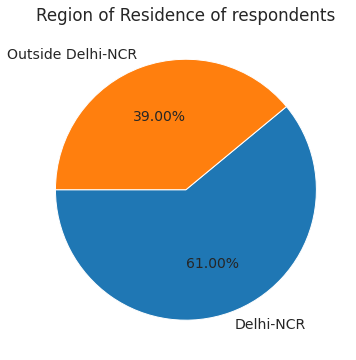

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Region of Residence of respondents')
plt.pie(region_per, labels=region_per.index, autopct='%1.2f%%', startangle=180);

In our data, 61% are from Delhi-NCR and others are from Outside of Delhi-NCR

### **Age range of respondents**

In [ ]:
top_ages = survey_df.Age_of_Subject.value_counts().head(10)
top_ages

20    211
21    188
19    138
22     93
16     67
18     66
17     58
13     48
14     48
23     44
Name: Age_of_Subject, dtype: int64

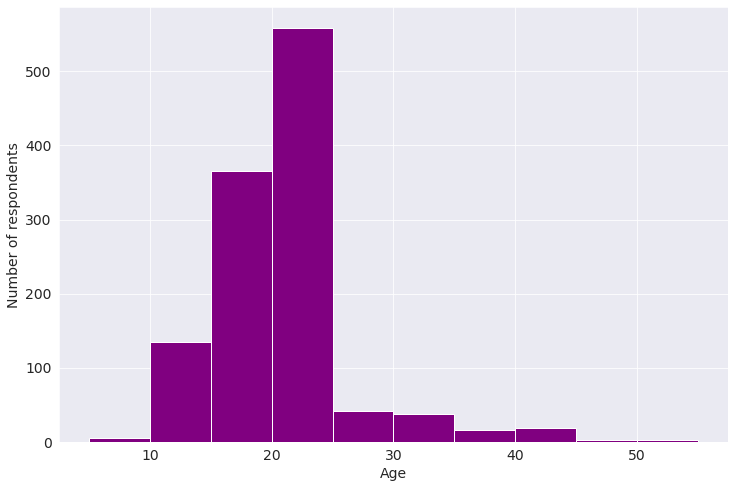

In [ ]:
plt.figure(figsize=(12, 8))
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age_of_Subject, np.arange(5,60,5), color='purple');

Most of our respondents are in between the age of 15-25

### **Rating of Online Class Experience**

In [ ]:
Rating_of_Online_Class = survey_df.Rating_of_Online_Class_experience.value_counts()
Rating_of_Online_Class

Very poor    413
Average      387
Good         230
Excellent     98
Poor          30
Name: Rating_of_Online_Class_experience, dtype: int64

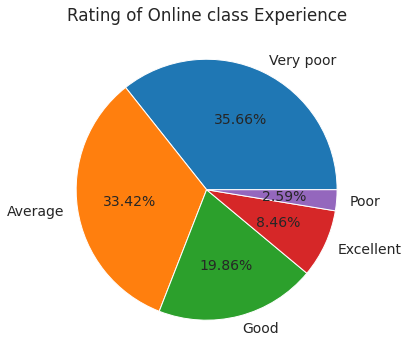

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Rating of Online class Experience')
plt.pie(Rating_of_Online_Class, labels=Rating_of_Online_Class.index, autopct='%1.2f%%');

35.66% says that quality of online class very poor, 33.42% says average while only 19.86% says that online class experience is good.

### **Health Issues during lockdown**

In [ ]:
Health_issues = survey_df.Health_issue_during_lockdown.value_counts()
Health_issues

NO     1021
YES     161
Name: Health_issue_during_lockdown, dtype: int64

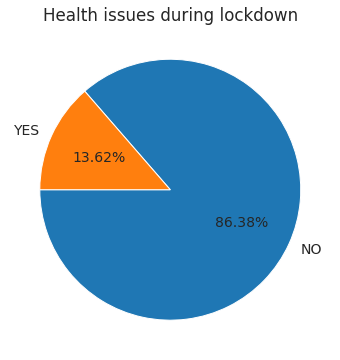

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Health issues during lockdown')
plt.pie(Health_issues, labels=Health_issues.index, autopct='%1.2f%%', startangle=180);

## **Asking and Answering Questions**



#### **Q1:What are the top 10 Stress busters?**

In [ ]:
top_stress_busters = survey_df.Stress_busters.value_counts().head(10)
top_stress_busters

Listening to music                276
Online gaming                     175
Watching web series               102
Reading books                      77
Scrolling through social media     74
Sleeping                           71
Online surfing                     51
Meditation                         48
Cooking                            41
Talking to your relatives          37
Name: Stress_busters, dtype: int64

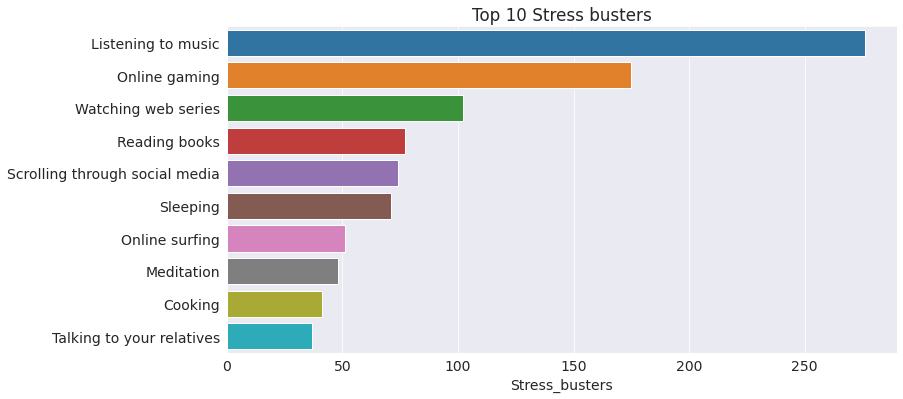

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Stress busters")
sns.barplot(x=top_stress_busters, y=top_stress_busters.index);

Most voted stress busters are listening to music, online gaming and watching web series.

#### **Q2: What are the available medium for online classes?**

In [ ]:
medium_class = survey_df.Medium_for_online_class.value_counts() 
medium_class

Laptop/Desktop                  545
Smartphone                      539
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: Medium_for_online_class, dtype: int64

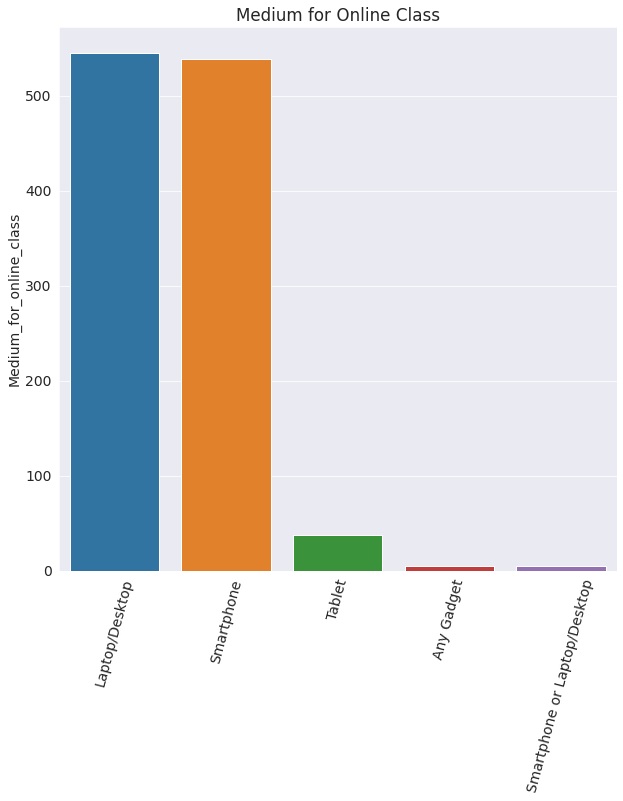

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=75)
plt.title("Medium for Online Class")
sns.barplot(x=medium_class.index, y=medium_class);

#### **Q3: Between the age of 18 - 25, what percentage are facing health issues during lockdown?**

In [ ]:
between_age_df = survey_df[(survey_df.Age_of_Subject >=18) & (survey_df.Age_of_Subject <=25)]

In [ ]:
between_age_df.Health_issue_during_lockdown.value_counts()

NO     639
YES    136
Name: Health_issue_during_lockdown, dtype: int64

In [ ]:
per_health_issues = between_age_df.Health_issue_during_lockdown.value_counts()/between_age_df.Health_issue_during_lockdown.count() *100
per_health_issues

NO     82.451613
YES    17.548387
Name: Health_issue_during_lockdown, dtype: float64

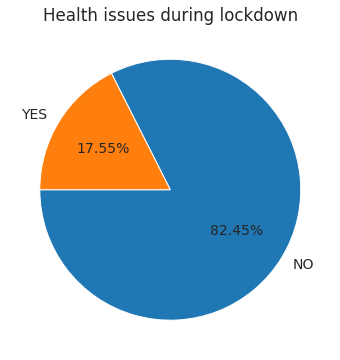

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Health issues during lockdown')
plt.pie(per_health_issues, labels=per_health_issues.index, autopct='%1.2f%%', startangle=180);

Between the age of 18-25, 17.55% faced health issues during lockdown which is higher than the overall percentage in our data(13.62%).

#### **Q4: What are the most commonly used social media platforms?**

In [ ]:
top_social_media = survey_df.Prefered_social_media_platform.value_counts().head(5)
top_social_media

Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Name: Prefered_social_media_platform, dtype: int64

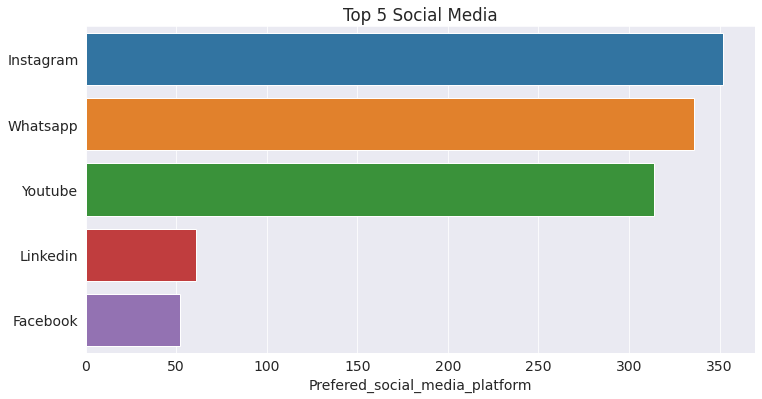

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Top 5 Social Media")
sns.barplot(x=top_social_media, y=top_social_media.index);

Most commonly used social media platforms are Instagram, Whatsapp, Youtube respectively.

#### **How is change in weight depends on different parameters?**

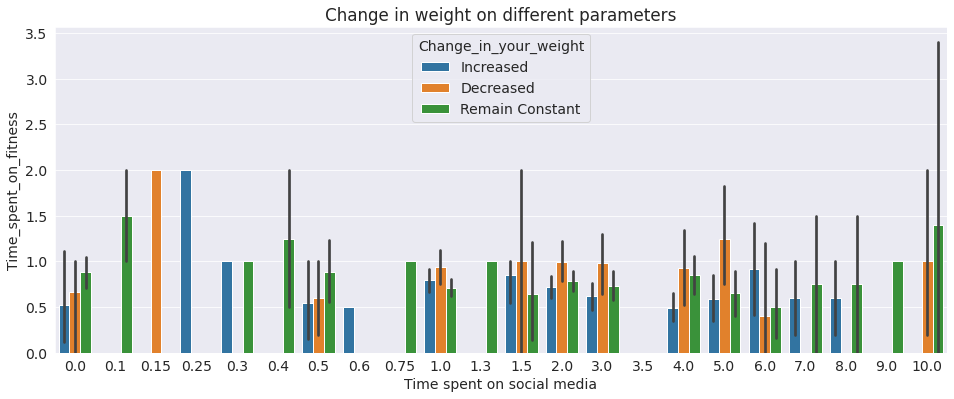

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x='Time_spent_on_social_media', y='Time_spent_on_fitness', data=survey_df, hue=survey_df.Change_in_your_weight)
plt.title('Change in weight on different parameters')
plt.ylabel('Time spent on fitness')
plt.xlabel('Time spent on social media');

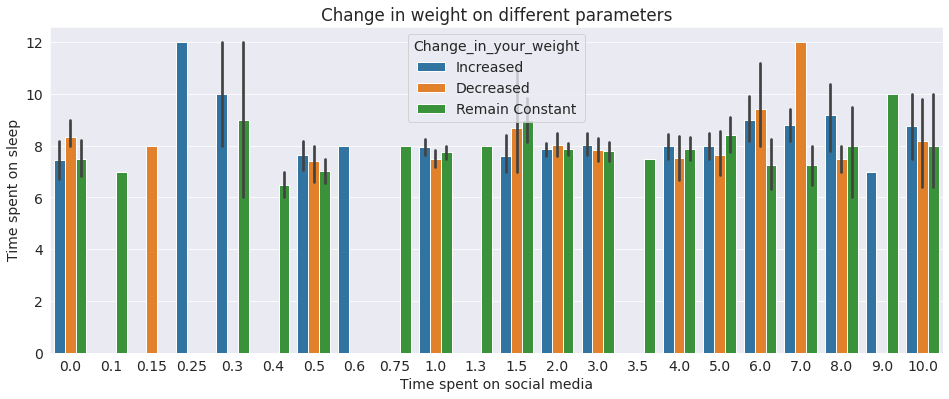

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x='Time_spent_on_social_media', y='Time_spent_on_sleep', data=survey_df, hue=survey_df.Change_in_your_weight)
plt.title('Change in weight on different parameters')
plt.ylabel('Time spent on sleep')
plt.xlabel('Time spent on social media');

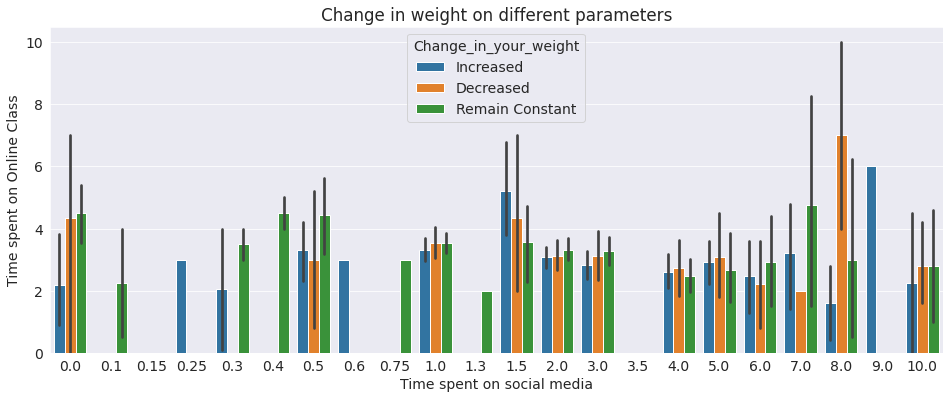

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(x='Time_spent_on_social_media', y='Time_spent_on_Online_Class', data=survey_df, hue=survey_df.Change_in_your_weight)
plt.title('Change in weight on different parameters')
plt.ylabel('Time spent on Online Class')
plt.xlabel('Time spent on social media');

## **Inferences and Conclusion**
The outbreak of COVID-19 and related lockdown had serious implications on lifestyle of students, mental health etc..

From the analysis, rating of online class is very low. 35.66% says that quality is very poor, and for 33.42% quality is average.
This study suggests that public authorities should take all the necessary measures to enhance the learning experience by mitigating the negative impacts caused due to the COVID-19 outbreak.


Libraries used in this project: 
* [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) : A software library written for the Python programming language for data manipulation and analysis.
* [Numpy](https://numpy.org/doc/stable/user/index.html) : A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
* [Matplotlib](https://matplotlib.org/) : A plotting library for the Python programming language and its numerical mathematics extension NumPy.
* [Seaborn](https://seaborn.pydata.org/) : A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.